In [3]:
%pylab inline
import bls
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


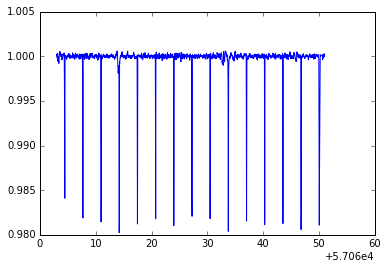

In [4]:
# Read the light curve
filename = '../ktwo211089792.txt'
time, lc, lcerror = np.genfromtxt(filename, unpack=True)

# plot the light curve
# ...
plt.figure()
plt.plot(time, lc)
plt.show()

In [5]:
# Define input variables

# temporary arrays
u = np.zeros_like(time)
v = np.zeros_like(time)

df = 0.001    # frequency step
nb =  200  # number of bins
qmi = 0.01  # minimum fractional transit duration
qma = 0.8  # maximum transit duration

# frequencies to test
fmax = 2 # search a mininum period of 0.5 days
fmin = 1.3/(time[-1]-time[0])  # search a maximum period 70% of the full time series duration

# build frequency array
nf = (fmax-fmin) / df
f = fmin + (np.arange(np.fix(nf)))*df

In [6]:
# call the BLS function
power, best_period, best_power, depth, qtran, in1, in2 = \
                   bls.eebls(time, lc, u, v, nf, fmin, df, nb, qmi, qma)


per = 1./f
duration = best_period*qtran
epoch0 = time[0] + (in1+in2)*0.5/float(nb)*best_period

In [7]:
# print the period of maximum power, the depth and duration of the transit
print 'best period:',best_period
print 'depth, duration:',depth, duration, epoch0

best period: 3.25628998769
depth, duration: 0.0139419577827 0.0831465395501 57064.4550839


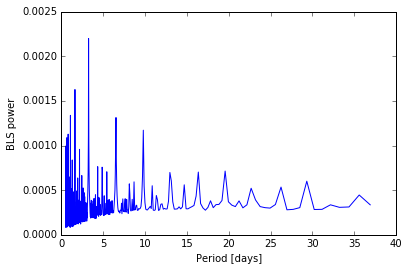

In [8]:
# plot the periodogram
plt.figure()
plt.plot(per, power)
plt.xlabel('Period [days]')
plt.ylabel('BLS power')
plt.show()


In [9]:
# calculate the signal detection efficiency 
# -- see Kovacs, Zucker & Mazeh (2002), eq. (6)
sde = (best_power - np.mean(power))/np.std(power)
sde

10.701894124664783

In [10]:
# phase fold the light curve on the best period
phase0 = (time-epoch0)/best_period
phase = phase0%1
phase[np.where(phase>0.5)[0]]-=1

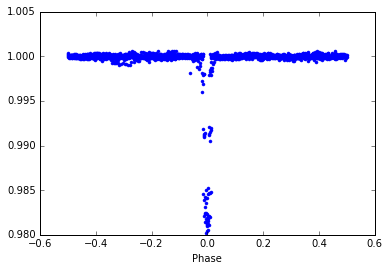

In [11]:
# plot the light curve phased at the best BLS period
plt.figure()
plt.plot(phase, lc,'.')
plt.xlabel('Phase')
plt.show()